<a href="https://colab.research.google.com/github/frammartina/Applied-AI-project/blob/main/0_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🌐 Connect Colab to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/AI/Final_assignment


Mounted at /content/drive
/content/drive/MyDrive/AI/Final_assignment


## ⚙️ Import Libraries

In [ ]:
!pip install pynrrd

In [ ]:
!pip install pandas openpyxl

In [ ]:
! pip install cleanvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 41.4 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

# Set seeds for random number generators in NumPy, Python and Tensor Flow
np.random.seed(42)
tf.random.set_seed(42);
tf.compat.v1.set_random_seed(42);

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from PIL import Image
import matplotlib.gridspec as gridspec
import cv2
import nrrd # to open our images
from cleanvision import Imagelab

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

2.17.1


## ⏳ Load the Data

In [ ]:
  file_path = '/content/drive/MyDrive/AI/Final_assignment/Train/pat1000_nodule.nrrd'
  image_data, header = nrrd.read(file_path)

In [ ]:
print(header)

OrderedDict([('type', 'int16'), ('dimension', 2), ('sizes', array([93, 86])), ('endian', 'little'), ('encoding', 'gzip')])


In [ ]:
# Controlla il range di valori
min_value = np.min(image_data)
max_value = np.max(image_data)
print(min_value)
print(max_value)

-2048
950


In [ ]:
# Liste per immagazzinare i dataset
full_slice_images = []
nodule_images = []

In [ ]:
import os
import re
import nrrd

file_path = '/content/drive/MyDrive/AI/Final_assignment/Train'
full_slice_images = []
nodule_images = []

# Funzione per estrarre il numero del paziente dal nome del file
def get_patient_number(filename):
    match = re.search(r'pat(\d+)', filename)
    if match:
        return int(match.group(1))  # Restituisce il numero di paziente come intero
    return None

# Creare una lista di file con i numeri di paziente e il nome del file
files_with_patient_numbers = []
for filename in os.listdir(file_path):
    if filename.endswith('.nrrd'):
        patient_number = get_patient_number(filename)
        if patient_number is not None:
            files_with_patient_numbers.append((patient_number, filename))

# Ordinare i file in base al numero del paziente
files_with_patient_numbers.sort(key=lambda x: x[0])

# Importare i dati in ordine
for patient_number, filename in files_with_patient_numbers:
    file_path_complete = os.path.join(file_path, filename)

    # Controlla se è un full_slice o un nodule
    if 'fullslice' in filename:
        data, header = nrrd.read(file_path_complete)
        full_slice_images.append(data)
    elif 'nodule' in filename:
        data, header = nrrd.read(file_path_complete)
        nodule_images.append(data)


full slice shape: (512, 512)
nodule shape: (92, 84)


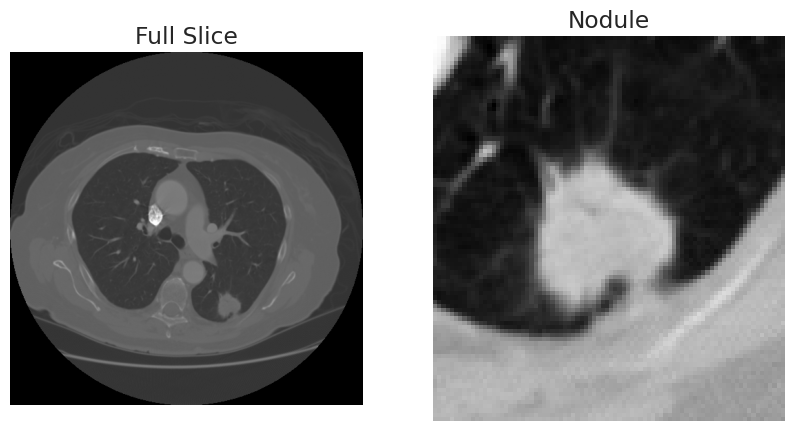

In [ ]:
print(f"full slice shape: {full_slice_images[0].shape}")
print(f"nodule shape: {nodule_images[0].shape}")

# visualize both images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# full_slice image
axes[0].imshow(full_slice_images[0], cmap='gray')
axes[0].set_title('Full Slice')
axes[0].axis('off')

# nodule image
axes[1].imshow(nodule_images[0], cmap='gray')
axes[1].set_title('Nodule')
axes[1].axis('off')

plt.show()

In [ ]:
# print the nodule images dimensions
for i, img in enumerate(nodule_images):
    print(f'Immagine {i} ha dimensioni: {img.shape}')

# as we can see they have different shapes
# i have to standardize them at a unique dimension
# I choose 64x64 in order to have a good compromise btw mantain important details for big images,
# and don't blurry too much the small ones

Immagine 0 ha dimensioni: (92, 84)
Immagine 1 ha dimensioni: (85, 90)
Immagine 2 ha dimensioni: (76, 74)
Immagine 3 ha dimensioni: (80, 85)
Immagine 4 ha dimensioni: (53, 59)
Immagine 5 ha dimensioni: (60, 59)
Immagine 6 ha dimensioni: (51, 51)
Immagine 7 ha dimensioni: (50, 50)
Immagine 8 ha dimensioni: (54, 54)
Immagine 9 ha dimensioni: (49, 51)
Immagine 10 ha dimensioni: (51, 51)
Immagine 11 ha dimensioni: (51, 50)
Immagine 12 ha dimensioni: (62, 62)
Immagine 13 ha dimensioni: (55, 57)
Immagine 14 ha dimensioni: (93, 85)
Immagine 15 ha dimensioni: (66, 67)
Immagine 16 ha dimensioni: (50, 57)
Immagine 17 ha dimensioni: (51, 52)
Immagine 18 ha dimensioni: (49, 50)
Immagine 19 ha dimensioni: (50, 48)
Immagine 20 ha dimensioni: (47, 46)
Immagine 21 ha dimensioni: (52, 49)
Immagine 22 ha dimensioni: (56, 51)
Immagine 23 ha dimensioni: (54, 52)
Immagine 24 ha dimensioni: (58, 68)
Immagine 25 ha dimensioni: (48, 49)
Immagine 26 ha dimensioni: (47, 48)
Immagine 27 ha dimensioni: (45, 46)
Im

In [ ]:
target_size = (64, 64)

# resize images
nodule_images_resized = []
for img in nodule_images:
    resized_img = cv2.resize(img, target_size)
    nodule_images_resized.append(resized_img)


In [ ]:
# convert in Numpy arrays
full_slice_dataset = np.array(full_slice_images)
nodule_dataset = np.array(nodule_images_resized)
#nodule_dataset = [np.array(img) for img in nodule_images]

print(f'Totale immagini full_slice: {len(full_slice_dataset)}')
print(f'Totale immagini nodule: {len(nodule_dataset)}')

Totale immagini full_slice: 2363
Totale immagini nodule: 2363


In [ ]:
# save the 2 datasets
np.save('/content/drive/MyDrive/AI/Final_assignment/full_slice_dataset_2.npy', full_slice_dataset)
np.save('/content/drive/MyDrive/AI/Final_assignment/nodule_dataset_2.npy', nodule_dataset)

In [ ]:
# load the 2 datasets
full_slice_dataset = np.load('/content/drive/MyDrive/AI/Final_assignment/full_slice_dataset_2.npy')
nodule_dataset = np.load('/content/drive/MyDrive/AI/Final_assignment/nodule_dataset_2.npy')

# Verifica il caricamento
print(f'number of full_slice images: {len(full_slice_dataset)}')
print(f'number of nodule images : {len(nodule_dataset)}')

number of full_slice images: 2363
number of nodule images : 2363


Import the tumor class

In [ ]:
# load the xlsx file
file_path = '/content/drive/MyDrive/AI/Final_assignment/dataset_lung.xlsx'
df = pd.read_excel(file_path)

print(df.head())

# separate columns
full_slice_files = df['Full_slice'].values
nodule_files = df['Nodule'].values
tumor_class = df['TumorClass'].values

            Full_slice            Nodule  TumorClass
0  pat1_fullslice.nrrd  pat1_nodule.nrrd           5
1  pat2_fullslice.nrrd  pat2_nodule.nrrd           5
2  pat3_fullslice.nrrd  pat3_nodule.nrrd           2
3  pat4_fullslice.nrrd  pat4_nodule.nrrd           5
4  pat5_fullslice.nrrd  pat5_nodule.nrrd           4


In [ ]:
len(tumor_class)

2363

##🔎 Inspect data

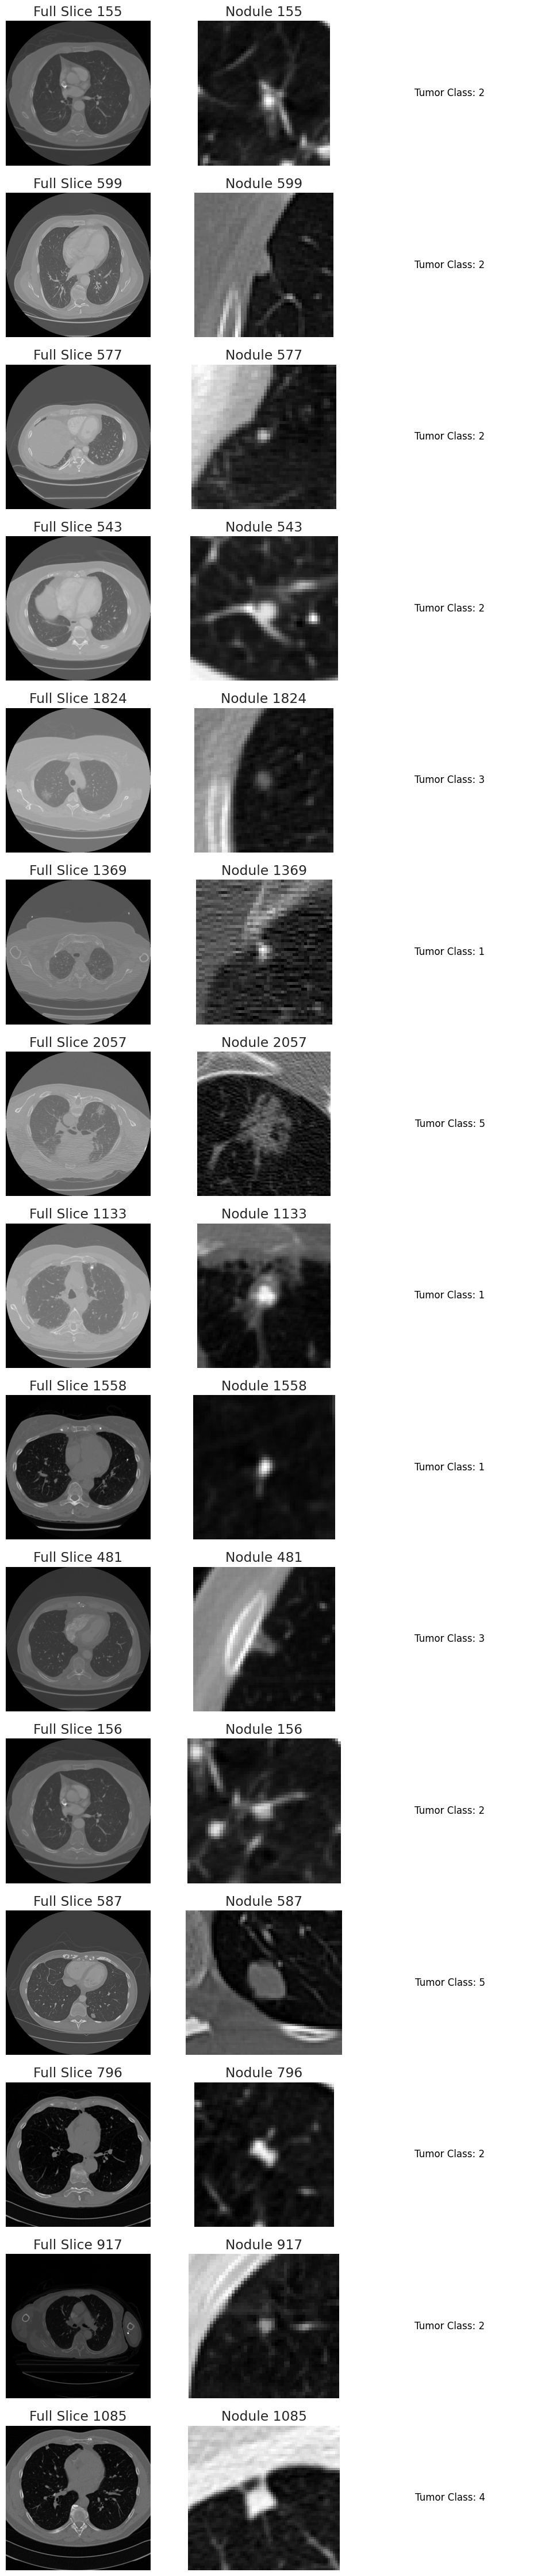

In [ ]:
# VISUALIZE SOME IMAGES
num_images = 15  # number of images to plot
fig, axes = plt.subplots(num_images, 3, figsize=(10, 3*num_images))  # 15 righe, 2 colonne
random_indices = random.sample(range(len(full_slice_images)), num_images) # select 15 random images

for i, idx in enumerate(random_indices):
    # Plot dell'immagine full_slice
    axes[i, 0].imshow(full_slice_dataset[idx], cmap='gray')
    axes[i, 0].set_title(f'Full Slice {idx+1}')
    axes[i, 0].axis('off')

    # Plot dell'immagine nodule
    axes[i, 1].imshow(nodule_dataset[idx], cmap='gray')
    axes[i, 1].set_title(f'Nodule {idx+1}')
    axes[i, 1].axis('off')

    # Stampare la classe del tumore nella terza colonna
    axes[i, 2].text(0.5, 0.5, f'Tumor Class: {tumor_class[idx]}',
                    ha='center', va='center', fontsize=12, color='black')
    axes[i, 2].axis('off')  # Nasconde l'asse della terza colonna

# Mostra le immagini
plt.tight_layout()  # Per evitare sovrapposizioni
plt.show()


## 🧹 CleanVision

It's a library that automatically detects various issues in the image data, such as images that are: (near) duplicates, blurry, over/under-exposed, etc. This data-centric AI package is designed as a quick first step for any computer vision project to find problems in the dataset.

 1. Nodule

In [ ]:
print(type(nodule_dataset))  # it should be <class 'numpy.ndarray'>
print(nodule_dataset.shape)  # (num_immagini, altezza, larghezza, canali)

<class 'list'>


AttributeError: 'list' object has no attribute 'shape'

In [ ]:
# create a temporary folder to save the images in .jpg
temp_folder = "/gdrive/MyDrive/AI/Final_assignment/nodule_temp/"
if not os.path.exists(temp_folder):
    os.makedirs(temp_folder)
else:
    print("The folder already exists")

# Save each image in this temporary folder
for i, img in enumerate(nodule_dataset):
    img_path = os.path.join(temp_folder, f"image_{i}.jpg")  #save as jpg
    cv2.imwrite(img_path, img.astype(np.uint8))

Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/2363 [00:00<?, ?it/s]

  0%|          | 0/2363 [00:00<?, ?it/s]

Issue checks completed. 2462 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Removing grayscale from potential issues in the dataset as it exceeds max_prevalence=0.5 
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  1 | odd_size         |           99 |
|  2 | dark             |            0 |
|  3 | light            |            0 |
|  4 | odd_aspect_ratio |            0 |
|  5 | low_information  |            0 |
|  6 | blurry           |            0 |
|  7 | exact_duplicates |            0 |
|  8 | near_duplicates  |            0 | 

--------------------- odd_size images ----------------------

Number of examples with this issue: 99
Examples representing most severe instances of this issue:



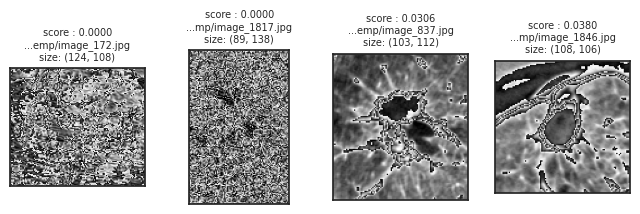

In [ ]:
# take the path of all the .jpg images in the folder
image_files = [os.path.join(temp_folder, f) for f in os.listdir(temp_folder) if f.endswith('.jpg')]

# Use Imagelab on that images
imagelab = Imagelab(filepaths=image_files)
imagelab.find_issues()
imagelab.report(show_id=True)

2. full_slices

In [ ]:
print(type(full_slice_dataset))  # it should be <class 'numpy.ndarray'>
print(full_slice_dataset.shape)  # (num_immagini, altezza, larghezza, canali)

<class 'numpy.ndarray'>
(2363, 512, 512)


In [ ]:
# create a temporary folder to save the images in .jpg
temp_folder = "/gdrive/MyDrive/AI/Final_assignment/full_slice_temp/"
if not os.path.exists(temp_folder):
    os.makedirs(temp_folder)

# Save each image in this temporary folder
for i, img in enumerate(full_slice_dataset):
    img_path = os.path.join(temp_folder, f"image_{i}.jpg")  # save as jpg
    cv2.imwrite(img_path, img.astype(np.uint8))

Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/2363 [00:00<?, ?it/s]

  0%|          | 0/2363 [00:00<?, ?it/s]

Issue checks completed. 2487 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Removing grayscale from potential issues in the dataset as it exceeds max_prevalence=0.5 
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  1 | exact_duplicates |           91 |
|  2 | near_duplicates  |           33 |
|  3 | dark             |            0 |
|  4 | light            |            0 |
|  5 | odd_aspect_ratio |            0 |
|  6 | low_information  |            0 |
|  7 | blurry           |            0 |
|  8 | odd_size         |            0 | 

----------------- exact_duplicates images ------------------

Number of examples with this issue: 91
Examples representing most severe instances of this issue:

Set: 0


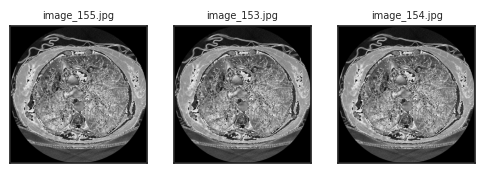

Set: 1


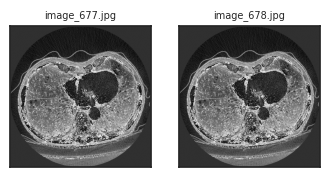

Set: 2


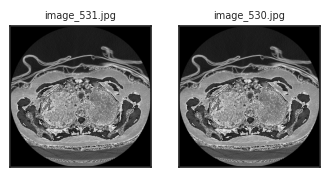

Set: 3


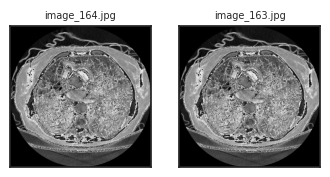

------------------ near_duplicates images ------------------

Number of examples with this issue: 33
Examples representing most severe instances of this issue:

Set: 0


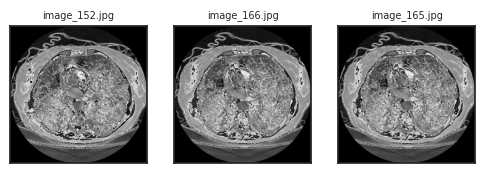

Set: 1


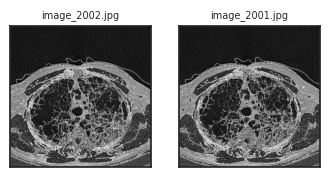

Set: 2


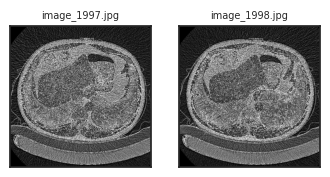

Set: 3


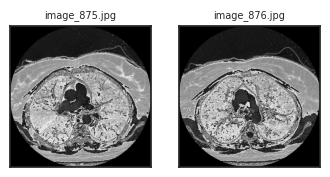

In [ ]:
temp_folder = "/gdrive/MyDrive/AI/Final_assignment/full_slice_temp/"
# take the path of all the .jpg images in the folder
image_files = [os.path.join(temp_folder, f) for f in os.listdir(temp_folder) if f.endswith('.jpg')]

# Use Imagelab on that images
imagelab = Imagelab(filepaths=image_files)
imagelab.find_issues()
imagelab.report(show_id=True)

# it found 91 exact duplicates and 33 near duplicates

In [ ]:
print(imagelab.issues.columns)

Index(['odd_size_score', 'is_odd_size_issue', 'odd_aspect_ratio_score',
       'is_odd_aspect_ratio_issue', 'low_information_score',
       'is_low_information_issue', 'light_score', 'is_light_issue',
       'grayscale_score', 'is_grayscale_issue', 'dark_score', 'is_dark_issue',
       'blurry_score', 'is_blurry_issue', 'exact_duplicates_score',
       'is_exact_duplicates_issue', 'near_duplicates_score',
       'is_near_duplicates_issue'],
      dtype='object')


In [ ]:
# extract indices of images with the identified problems
exact_duplicates_indices = imagelab.issues[imagelab.issues['is_exact_duplicates_issue'] == True].index.tolist()
near_duplicates_indices = imagelab.issues[imagelab.issues['is_near_duplicates_issue'] == True].index.tolist()

# print the inices
print("Indici delle immagini con problema 'exact_duplicate':", exact_duplicates_indices)
print("Indici delle immagini con problema 'near_duplicate':", near_duplicates_indices)

Indici delle immagini con problema 'exact_duplicate': ['/gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_677.jpg', '/gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_531.jpg', '/gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_164.jpg', '/gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_1564.jpg', '/gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_256.jpg', '/gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_337.jpg', '/gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_2325.jpg', '/gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_1614.jpg', '/gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_1014.jpg', '/gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_1616.jpg', '/gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_1525.jpg', '/gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_840.jpg', '/gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_1645.jpg', '/gdrive/MyDrive/AI/Final_assignment/full

**Exact duplicates:**

In [ ]:
# print the number of sets of duplicates
imagelab.info["exact_duplicates"]["num_sets"]

45

In [ ]:
# Print the number of duplicated images for each set
duplicated_images = imagelab.info["exact_duplicates"]["sets"]
print(f"numebr of duplicated set: {len(duplicated_images)}")

for i, duplicate_set in enumerate(duplicated_images):
    print(f"Set {i}: contains {len(duplicate_set)} duplicated images")

numebr of duplicated set: 45
Set 0: contains 2 duplicated images
Set 1: contains 2 duplicated images
Set 2: contains 2 duplicated images
Set 3: contains 2 duplicated images
Set 4: contains 2 duplicated images
Set 5: contains 2 duplicated images
Set 6: contains 2 duplicated images
Set 7: contains 2 duplicated images
Set 8: contains 2 duplicated images
Set 9: contains 2 duplicated images
Set 10: contains 2 duplicated images
Set 11: contains 2 duplicated images
Set 12: contains 2 duplicated images
Set 13: contains 2 duplicated images
Set 14: contains 2 duplicated images
Set 15: contains 2 duplicated images
Set 16: contains 2 duplicated images
Set 17: contains 2 duplicated images
Set 18: contains 2 duplicated images
Set 19: contains 2 duplicated images
Set 20: contains 2 duplicated images
Set 21: contains 2 duplicated images
Set 22: contains 2 duplicated images
Set 23: contains 2 duplicated images
Set 24: contains 2 duplicated images
Set 25: contains 2 duplicated images
Set 26: contains 2 

=> Visualize

In [ ]:
# take a random set
print(duplicated_images[8])

['/gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_1014.jpg', '/gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_1013.jpg']


In [ ]:
# Ottieni la lista di tutti i file nella cartella
files_in_folder = os.listdir(temp_folder)
print(len(files_in_folder))
print(files_in_folder[0])

# Estrai i numeri dagli nomi dei file (es. 'image_1843.jpg' -> 1843)
file_numbers = [int(filename.split('_')[1].split('.')[0]) for filename in files_in_folder]

# Trova il numero minimo e massimo
min_index = min(file_numbers)
max_index = max(file_numbers)

print(f"Indice più piccolo: {min_index}")
print(f"Indice più grande: {max_index}")

2363
image_2161.jpg
Indice più piccolo: 0
Indice più grande: 2362


/gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_1525.jpg
1525
/gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_1526.jpg
1526


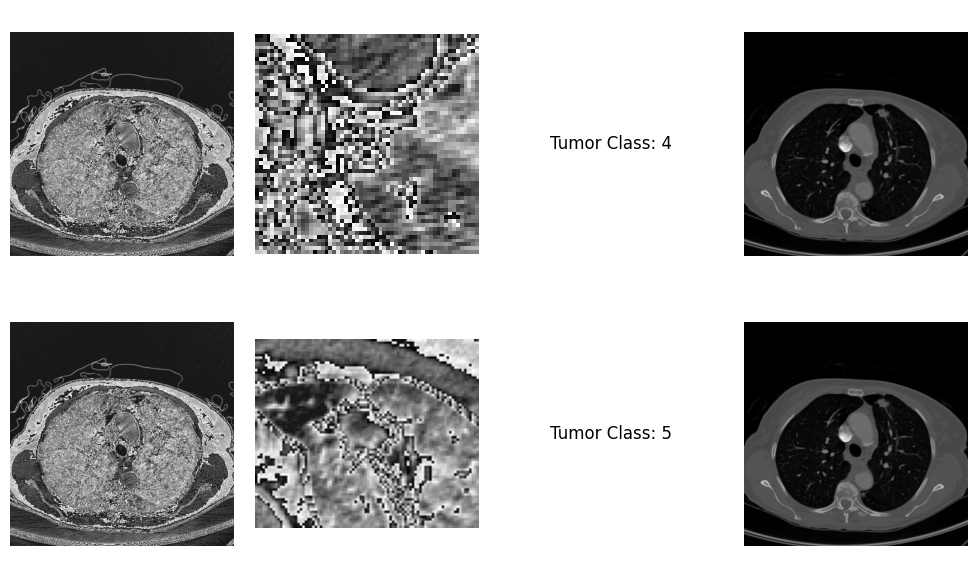

In [ ]:
import matplotlib.image as mpimg

# Visualizza le immagini duplicate
num_duplicates = len(duplicated_images[5])
fig, axes = plt.subplots(num_duplicates, 4, figsize=(10, 3*num_duplicates))

# Visualizza le immagini e la loro tumor_class
for i, img_path in enumerate(duplicated_images[10]):
    # Carica l'immagine
    img = mpimg.imread(img_path)
    print(img_path)

    # Plot dell'immagine
    axes[i, 0].imshow(img, cmap='gray')
    axes[i, 0].axis('off')

    # Trova l'indice corrispondente nell'array tumor_class
    # Extract the image index from the filename
    img_idx = int(os.path.basename(img_path).split('_')[1].split('.')[0])  # Extract index from filename
    tumor_class_value = tumor_class[img_idx]  # Get corresponding class
    print(img_idx)

    # Carica l'immagine del nodule
    nodule_img_path = img_path.replace('full_slice', 'nodule')  # Sostituisci 'full_slice' con 'nodule' nel percorso
    nodule_img = mpimg.imread(nodule_img_path)

    # Plot dell'immagine nodule
    axes[i, 1].imshow(nodule_img, cmap='gray')
    axes[i, 1].axis('off')

    # Aggiungi la tumor_class come testo
    axes[i, 2].text(0.5, 0.5, f'Tumor Class: {tumor_class_value}',
                    ha='center', va='center', fontsize=12, color='black')
    axes[i, 2].axis('off')  # Nasconde l'asse della seconda colonna

    axes[i, 3].imshow(full_slice_dataset[img_idx], cmap='gray')
    axes[i, 3].axis('off')

# Mostra le immagini
plt.tight_layout()
plt.show()

# as we can see the 2 images are labeled with different class values

In [ ]:
# check for each set, how the 2 images are labeled
# if they are labeled in the same way, I will mantain only 1 of the 2
# if they are labeled in different ways, I will remove both

deleate_images=[]
duplicated_images = imagelab.info["exact_duplicates"]["sets"]
print(f"Number of duplicated sets: {len(duplicated_images)}")

# for each set
for i, duplicate_set in enumerate(duplicated_images):
    print(f"Set {i}: contains {len(duplicate_set)} duplicated images")

    # Estrai l'indice dell'immagine (presumendo che l'indice sia nel nome del file, come 'image_784.jpg')
    img_idx_1 = int(os.path.basename(duplicate_set[0]).split('_')[1].split('.')[0])
    tumor_class_value_1 = tumor_class[img_idx_1]  # Ottieni la classe del tumore corrispondente
    print(f"  Image {duplicate_set[0]} -> Tumor Class: {tumor_class_value_1}")

    img_idx_2 = int(os.path.basename(duplicate_set[1]).split('_')[1].split('.')[0])
    tumor_class_value_2 = tumor_class[img_idx_2]  # Ottieni la classe del tumore corrispondente
    print(f"  Image {duplicate_set[1]} -> Tumor Class: {tumor_class_value_2}")

    if i==42:
      img_idx_3 = int(os.path.basename(duplicate_set[2]).split('_')[1].split('.')[0])
      tumor_class_value_3 = tumor_class[img_idx_3]  # Ottieni la classe del tumore corrispondente
      print(f"  Image {duplicate_set[2]} -> Tumor Class: {tumor_class_value_3}")


    if tumor_class_value_1 == tumor_class_value_2:
      deleate_images.append(img_idx_2)
      if i==42:
        if tumor_class_value_1 == tumor_class_value_3:
          deleate_images.append(img_idx_3)
        else:
          deleate_images.append(img_idx_3)
          deleate_images.append(img_idx_1)
      print(f"set {i} same class")
    else:
      deleate_images.append(img_idx_1)
      deleate_images.append(img_idx_2)
      if i==42:
        deleate_images.append(img_idx_3)
      print(f"set {i} different classes")


print(f"number of duplicates to deleate: {len(deleate_images)}")

Number of duplicated sets: 45
Set 0: contains 2 duplicated images
  Image /gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_677.jpg -> Tumor Class: 2
  Image /gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_678.jpg -> Tumor Class: 2
set 0 same class
Set 1: contains 2 duplicated images
  Image /gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_531.jpg -> Tumor Class: 3
  Image /gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_530.jpg -> Tumor Class: 3
set 1 same class
Set 2: contains 2 duplicated images
  Image /gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_164.jpg -> Tumor Class: 3
  Image /gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_163.jpg -> Tumor Class: 3
set 2 same class
Set 3: contains 2 duplicated images
  Image /gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_1564.jpg -> Tumor Class: 2
  Image /gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_1565.jpg -> Tumor Class: 2
set 3 same class
Set 4: contains 2 du

**Near duplicates:**

In [ ]:
# print the number of sets of duplicates
imagelab.info["near_duplicates"]["num_sets"]

16

In [ ]:
# Print the number of duplicated images for each set
near_duplicated_images = imagelab.info["near_duplicates"]["sets"]
print(f"number of duplicated set: {len(near_duplicated_images)}")

for i, near_duplicate_set in enumerate(near_duplicated_images):
    print(f"Set {i}: contains {len(near_duplicate_set)} near duplicated images")

number of duplicated set: 16
Set 0: contains 2 near duplicated images
Set 1: contains 2 near duplicated images
Set 2: contains 2 near duplicated images
Set 3: contains 2 near duplicated images
Set 4: contains 2 near duplicated images
Set 5: contains 2 near duplicated images
Set 6: contains 2 near duplicated images
Set 7: contains 2 near duplicated images
Set 8: contains 3 near duplicated images
Set 9: contains 2 near duplicated images
Set 10: contains 2 near duplicated images
Set 11: contains 2 near duplicated images
Set 12: contains 2 near duplicated images
Set 13: contains 2 near duplicated images
Set 14: contains 2 near duplicated images
Set 15: contains 2 near duplicated images


In [ ]:
# take a random set
print(near_duplicated_images[15])

['/gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_2019.jpg', '/gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_2020.jpg']


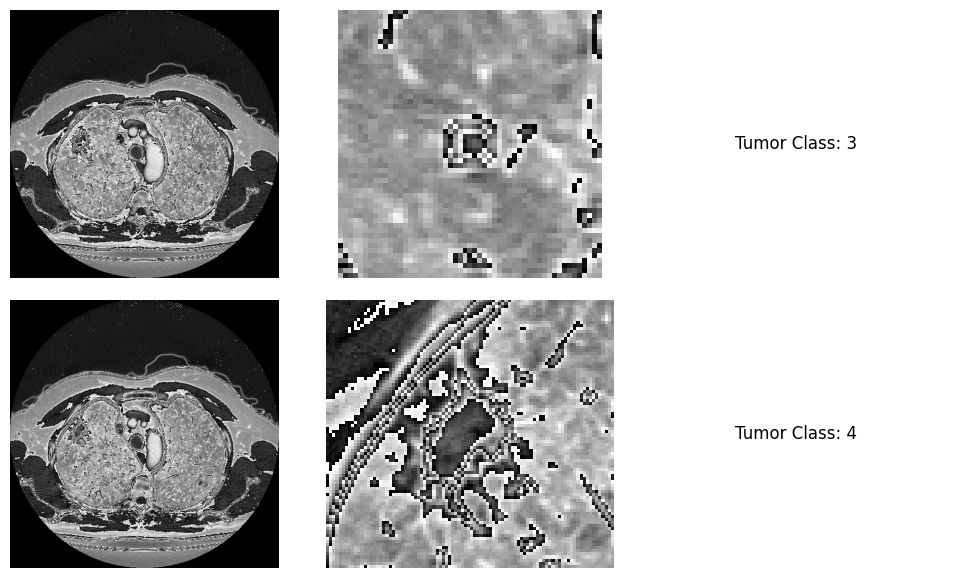

In [ ]:
import matplotlib.image as mpimg

# Visualizza le immagini duplicate
num_duplicates = len(near_duplicated_images[15])
fig, axes = plt.subplots(num_duplicates, 3, figsize=(10, 3*num_duplicates))

# Visualizza le immagini e la loro tumor_class
for i, img_path in enumerate(near_duplicated_images[15]):
    # Carica l'immagine
    img = mpimg.imread(img_path)

    # Plot dell'immagine
    axes[i, 0].imshow(img, cmap='gray')
    axes[i, 0].axis('off')

    # Trova l'indice corrispondente nell'array tumor_class
    # Extract the image index from the filename
    img_idx = int(os.path.basename(img_path).split('_')[1].split('.')[0])  # Extract index from filename
    tumor_class_value = tumor_class[img_idx]  # Get corresponding class

    # Carica l'immagine del nodule
    nodule_img_path = img_path.replace('full_slice', 'nodule')  # Sostituisci 'full_slice' con 'nodule' nel percorso
    nodule_img = mpimg.imread(nodule_img_path)

    # Plot dell'immagine nodule
    axes[i, 1].imshow(nodule_img, cmap='gray')
    axes[i, 1].axis('off')

    # Aggiungi la tumor_class come testo
    axes[i, 2].text(0.5, 0.5, f'Tumor Class: {tumor_class_value}',
                    ha='center', va='center', fontsize=12, color='black')
    axes[i, 2].axis('off')  # Nasconde l'asse della seconda colonna

# Mostra le immagini
plt.tight_layout()
plt.show()

# as we can see the 2 full_slice images are very similar, quite exact duplicates => i remove 1 of them

In [ ]:
# check for each set, how the 2 images are labeled
# if they are labeled in the same way, I will mantain only 1 of the 2
# if they are labeled in different ways, I will remove both

near_duplicated_images = imagelab.info["near_duplicates"]["sets"]
print(f"Number of duplicated sets: {len(near_duplicated_images)}")

# for each set
for i, duplicate_set in enumerate(near_duplicated_images):
    print(f"Set {i}: contains {len(duplicate_set)} duplicated images")

    # Estrai l'indice dell'immagine (presumendo che l'indice sia nel nome del file, come 'image_784.jpg')
    img_idx_1 = int(os.path.basename(duplicate_set[0]).split('_')[1].split('.')[0])
    tumor_class_value_1 = tumor_class[img_idx_1]  # Ottieni la classe del tumore corrispondente
    print(f"  Image {duplicate_set[0]} -> Tumor Class: {tumor_class_value_1}")

    img_idx_2 = int(os.path.basename(duplicate_set[1]).split('_')[1].split('.')[0])
    tumor_class_value_2 = tumor_class[img_idx_2]  # Ottieni la classe del tumore corrispondente
    print(f"  Image {duplicate_set[1]} -> Tumor Class: {tumor_class_value_2}")

    if i==8:
      img_idx_3 = int(os.path.basename(duplicate_set[2]).split('_')[1].split('.')[0])
      tumor_class_value_3 = tumor_class[img_idx_3]  # Ottieni la classe del tumore corrispondente
      print(f"  Image {duplicate_set[2]} -> Tumor Class: {tumor_class_value_3}")


    if tumor_class_value_1 == tumor_class_value_2:
      deleate_images.append(img_idx_2)
      if i==8:
        if tumor_class_value_1 == tumor_class_value_3:
          deleate_images.append(img_idx_3)
        else:
          deleate_images.append(img_idx_3)
          deleate_images.append(img_idx_1)
      print(f"set {i} same class")
    else:
      deleate_images.append(img_idx_1)
      deleate_images.append(img_idx_2)
      if i==8:
        deleate_images.append(img_idx_3)
      print(f"set {i} different classes")


Number of duplicated sets: 16
Set 0: contains 2 duplicated images
  Image /gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_2002.jpg -> Tumor Class: 4
  Image /gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_2001.jpg -> Tumor Class: 3
set 0 different classes
Set 1: contains 2 duplicated images
  Image /gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_1997.jpg -> Tumor Class: 4
  Image /gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_1998.jpg -> Tumor Class: 3
set 1 different classes
Set 2: contains 2 duplicated images
  Image /gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_875.jpg -> Tumor Class: 1
  Image /gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_876.jpg -> Tumor Class: 3
set 2 different classes
Set 3: contains 2 duplicated images
  Image /gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_1227.jpg -> Tumor Class: 3
  Image /gdrive/MyDrive/AI/Final_assignment/full_slice_temp/image_1226.jpg -> Tumor Class: 3
set 3 same c

In [ ]:
print(f"number of duplicates to deleate: {len(deleate_images)}")

# I will remove these images from the full_slice dataset, but i will mantein them in the nodule_dataset

number of duplicates to deleate: 88


In [ ]:
deleate_images

[678,
 530,
 163,
 1565,
 255,
 337,
 336,
 2325,
 2324,
 1615,
 1014,
 1013,
 1616,
 1617,
 1525,
 1526,
 841,
 1646,
 991,
 845,
 844,
 1842,
 1841,
 1680,
 694,
 695,
 475,
 476,
 344,
 345,
 1819,
 176,
 367,
 1155,
 675,
 674,
 305,
 78,
 1893,
 351,
 350,
 1033,
 2231,
 441,
 165,
 2213,
 1711,
 1548,
 117,
 116,
 89,
 90,
 140,
 160,
 161,
 2218,
 1339,
 155,
 153,
 154,
 952,
 951,
 294,
 2002,
 2001,
 1997,
 1998,
 875,
 876,
 1226,
 2058,
 1773,
 2013,
 1283,
 1282,
 152,
 166,
 165,
 1924,
 1561,
 1560,
 2054,
 651,
 1296,
 1297,
 1771,
 2019,
 2020]

In [ ]:
print(f"number of images to remove (before removing duplicates): {len(deleate_images)}")

# Rimuovere duplicati
deleate_images = list(set(deleate_images))
deleate_images.sort(reverse=True)

print(f"number of images to remove (after removing duplicates): {len(deleate_images)}")


number of images to remove (before removing duplicates): 88
number of images to remove (after removing duplicates): 87


In [ ]:
# Rimuovere le immagini corrispondenti dalle due liste
nodule_cleaned = [img for i, img in enumerate(nodule_dataset) if i not in deleate_images]
full_slice_cleaned = [img for i, img in enumerate(full_slice_dataset) if i not in deleate_images]
tumor_class_clean = [cls for i, cls in enumerate(tumor_class) if i not in deleate_images]


In [ ]:
# Rimuovere le immagini e le label corrispondenti
full_slice_cleaned = np.delete(full_slice_dataset, deleate_images, axis=0)
nodule_cleaned = np.delete(nodule_dataset, deleate_images, axis=0)
#nodule_cleaned = [img for i, img in enumerate(nodule_dataset) if i not in deleate_images]
tumor_class_clean = np.delete(tumor_class, deleate_images, axis=0)

print(f"number of images full: {len(full_slice_cleaned)}")
print(f"number of images nodule: {len(tumor_class_clean)}")
print(f"number of labels: {len(tumor_class_clean)}")

# just to check:
# 2363 - 87 = 2276

number of images full: 2276
number of images nodule: 2276
number of labels: 2276


In [ ]:
# save the data in a .npz file with the same structure
np.save('/content/drive/MyDrive/AI/Final_assignment/full_slice_dataset_clean.npy', full_slice_cleaned)
np.save('/content/drive/MyDrive/AI/Final_assignment/nodule_dataset_clean.npy', nodule_cleaned)
np.save('/content/drive/MyDrive/AI/Final_assignment/tumor_class_clean.npy', tumor_class_clean)

In [ ]:
full_slice_clean= np.load('/content/drive/MyDrive/AI/Final_assignment/full_slice_dataset_clean.npy')
nodule_clean = np.load('/content/drive/MyDrive/AI/Final_assignment/nodule_dataset_clean.npy')
tumor_class_clean = np.load('/content/drive/MyDrive/AI/Final_assignment/tumor_class_clean.npy')
print(f"number of images: {len(full_slice_clean)}")
print(f"number of images nodule: {len(nodule_clean)}")
print(f"number of labels {len(tumor_class_clean)}")

number of images: 2276
number of images nodule: 2276
number of labels 2276


## prova senza ridimensionare le nodule

In [ ]:
import pickle

# Salva la lista usando pickle
with open('/content/drive/MyDrive/AI/Final_assignment/nodule_dataset_clean_size.pkl', 'wb') as f:
    pickle.dump(nodule_cleaned, f)


In [ ]:
import pickle

# Carica il file salvato con pickle
with open('/content/drive/MyDrive/AI/Final_assignment/nodule_dataset_clean_size.pkl', 'rb') as f:
    nodule_cleaned_loaded = pickle.load(f)

# Verifica il tipo del contenuto caricato
print(type(nodule_cleaned_loaded))
print(len(nodule_cleaned_loaded))

<class 'list'>
2276


In [ ]:
# Funzione per ritagliare il 70% centrale
def crop_center(image):
    h, w = image.shape[:2]  # Ottieni l'altezza e la larghezza dell'immagine
    top = int((h * 0.15))  # 15% dall'alto
    left = int((w * 0.15))  # 15% da sinistra
    bottom = int(h - top)  # 15% dal basso
    right = int(w - left)  # 15% da destra
    return image[top:bottom, left:right]  # Ritorna il ritaglio centrale

# Ritaglia tutte le immagini nel dataset
nodule_cleaned_cropped = [crop_center(img) for img in nodule_cleaned]

# Verifica per una delle immagini
print(nodule_cleaned_cropped[0].shape)  # Dovresti ottenere una dimensione ridotta del 70%

(66, 60)


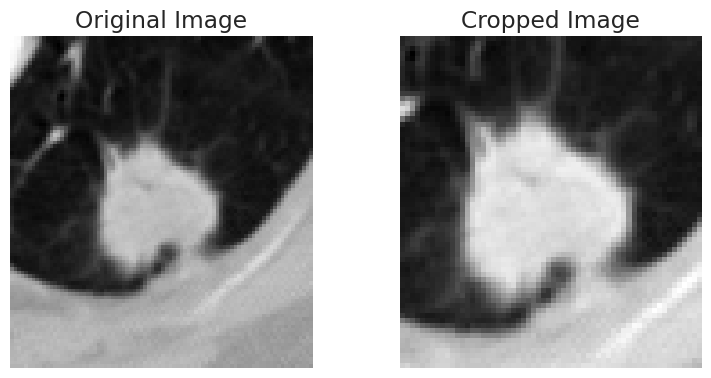

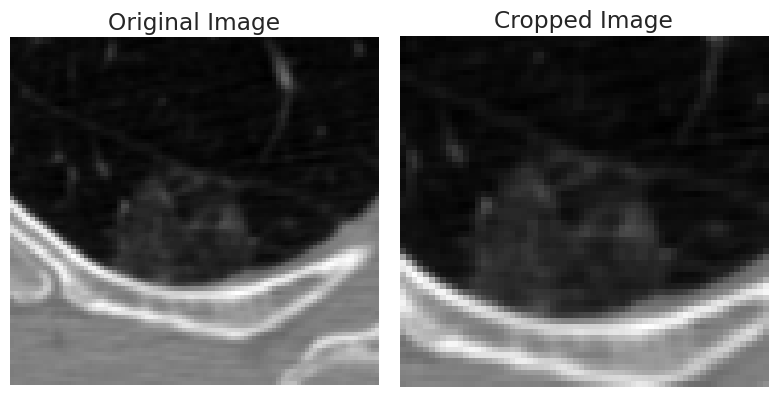

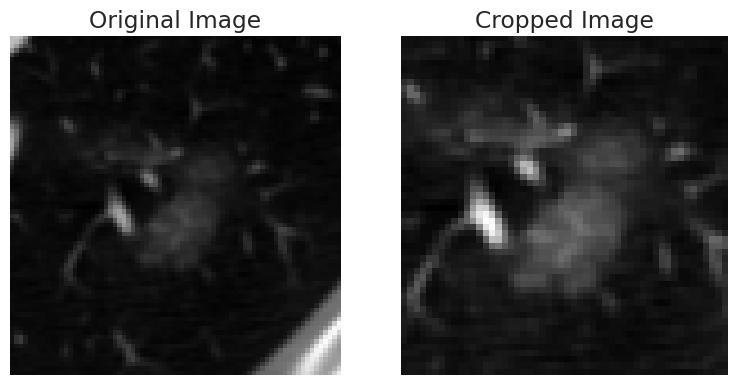

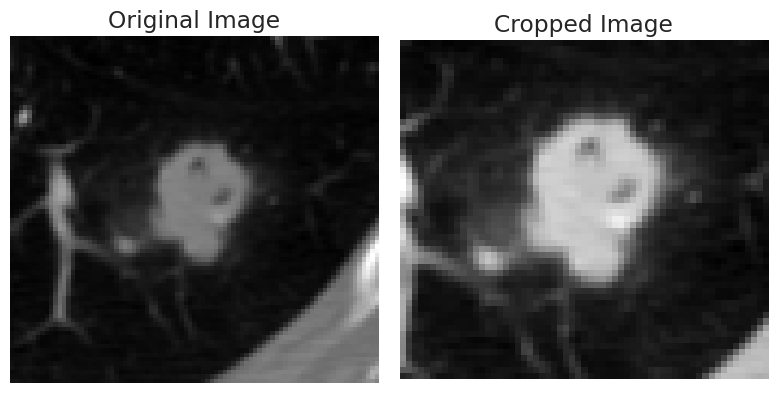

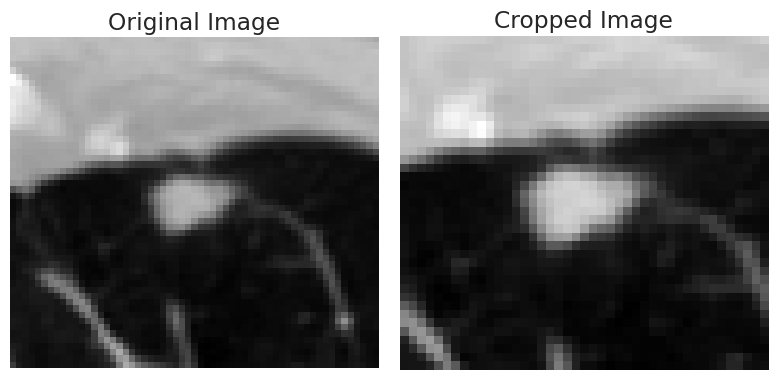

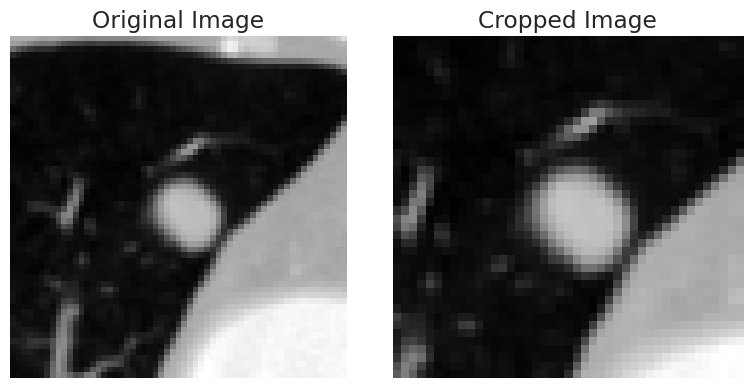

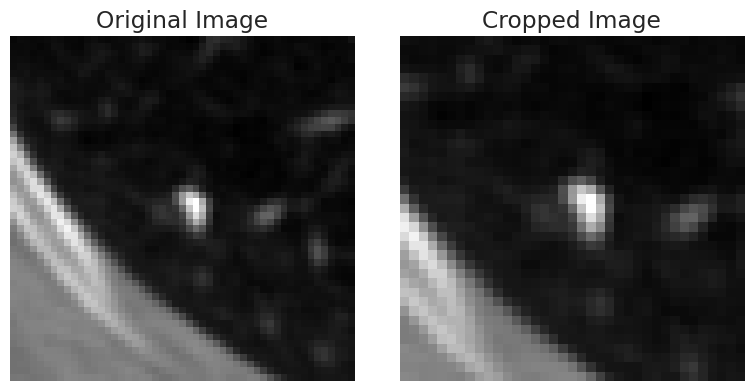

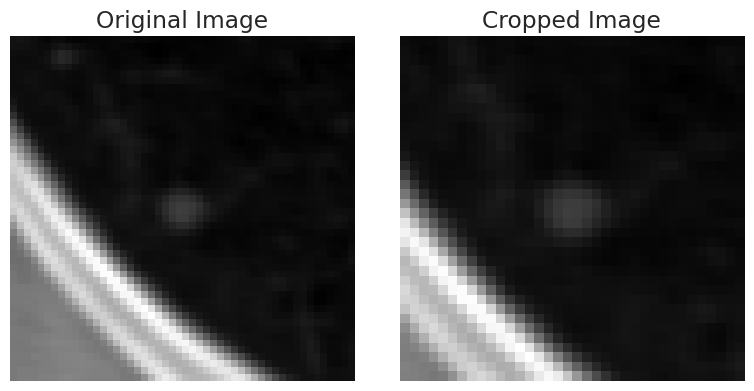

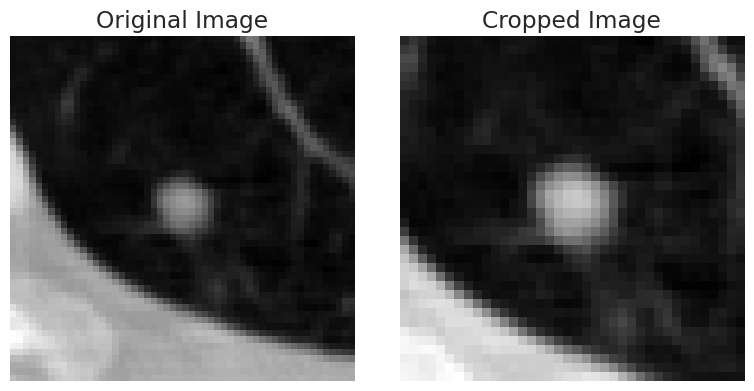

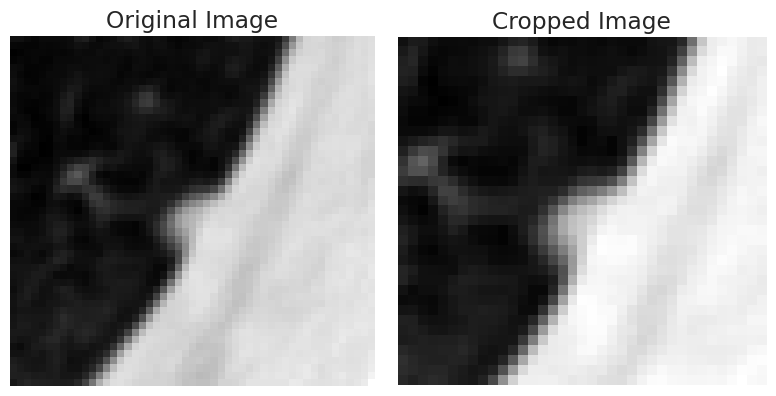

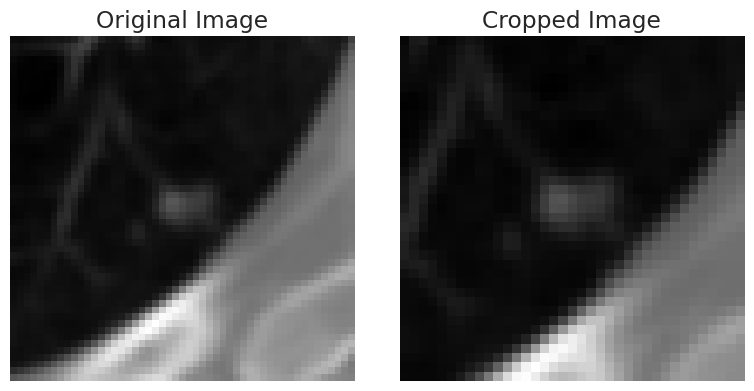

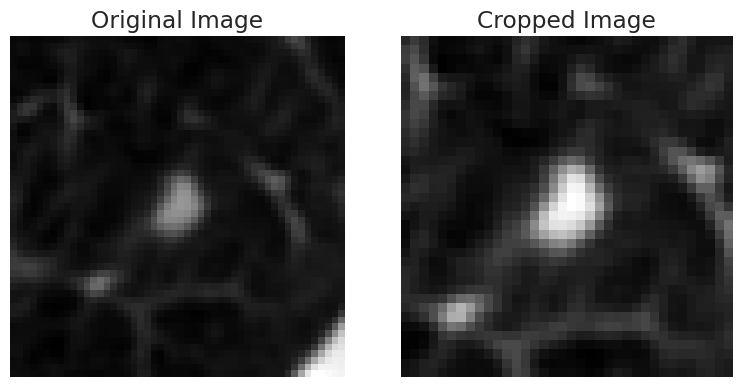

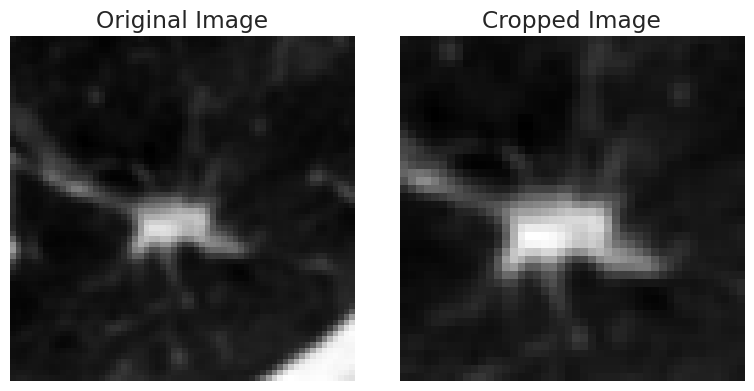

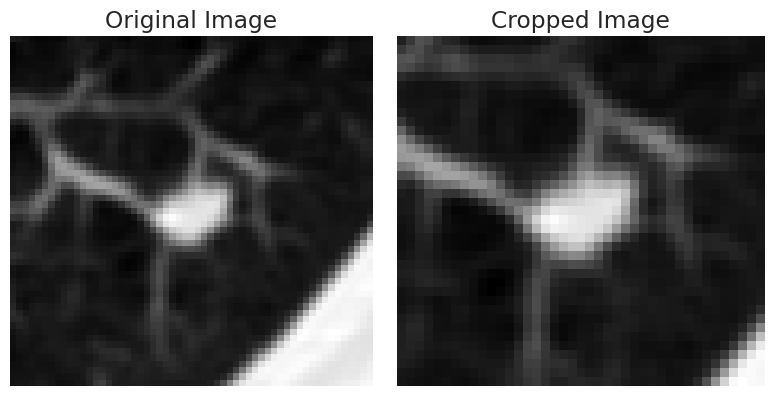

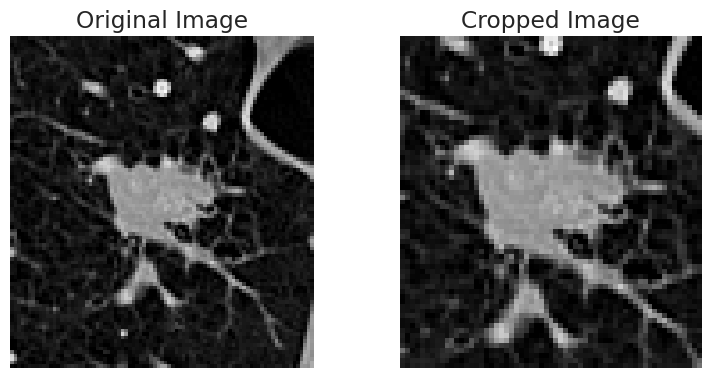

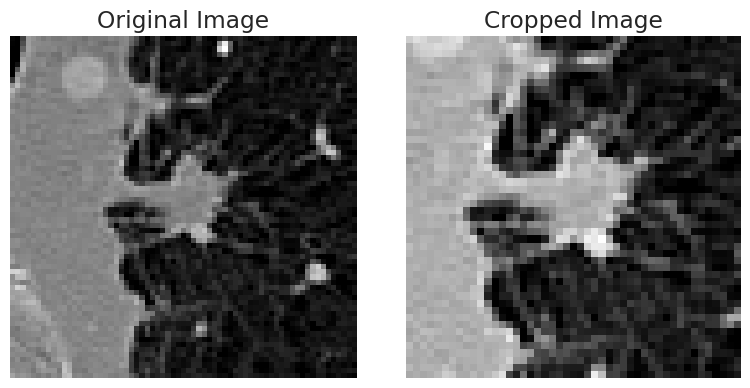

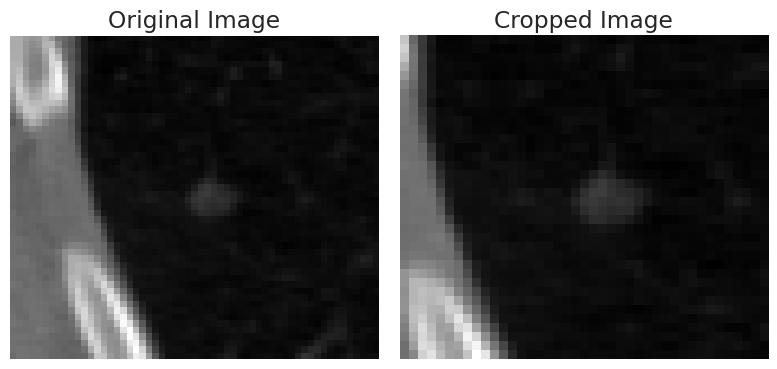

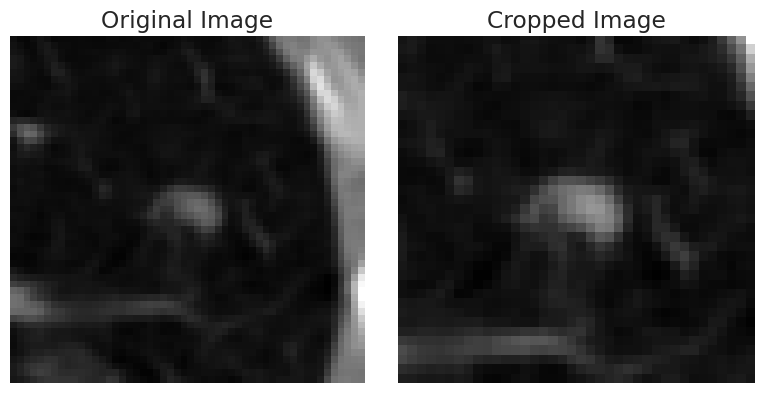

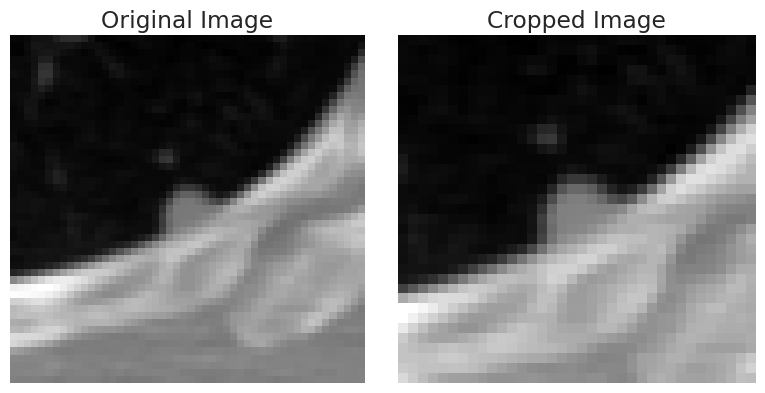

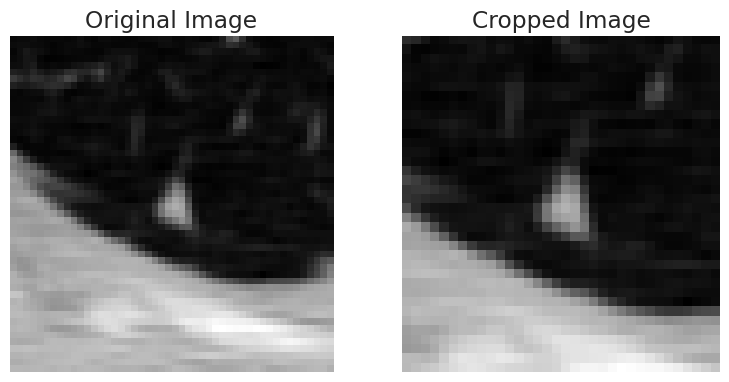

In [ ]:
import matplotlib.pyplot as plt

# Mostra le prime 20 immagini affiancate (originale e ritagliata)
for img in nodule_cleaned[:20]:
    # Ritaglia l'immagine
    cropped_img = crop_center(img)

    # Crea un layout con 2 colonne (prima e dopo il cropping)
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # due immagini affiancate, dimensione figura ridotta
    axes[0].imshow(img, cmap='gray')
    axes[0].axis('off')  # Disabilita gli assi per l'immagine originale
    axes[0].set_title('Original Image')  # Titolo per l'immagine originale

    axes[1].imshow(cropped_img, cmap='gray')
    axes[1].axis('off')  # Disabilita gli assi per l'immagine ritagliata
    axes[1].set_title('Cropped Image')  # Titolo per l'immagine ritagliata

    plt.tight_layout()  # Ottimizza la disposizione
    plt.show()  # Mostra l'immagine



In [ ]:
import pickle

# Salva la lista usando pickle
with open('/content/drive/MyDrive/AI/Final_assignment/nodule_dataset_clean_cropped.pkl', 'wb') as f:
    pickle.dump(nodule_cleaned_cropped, f)


In [ ]:
import pickle

# Carica il file salvato con pickle
with open('/content/drive/MyDrive/AI/Final_assignment/nodule_dataset_clean_cropped.pkl', 'rb') as f:
    nodule_cleaned_loaded = pickle.load(f)

# Verifica il tipo del contenuto caricato
print(type(nodule_cleaned_loaded))
print(len(nodule_cleaned_loaded))

<class 'list'>
2276
